In [57]:
import pandas as pd

data = pd.read_csv("evolution_data.csv")

print(data.head())
print(data.describe())


   Generation  Individual  Fitness  Density  Avg_Neighbors
0           0           0     5841   0.4996         3.9968
1           0           1     6005   0.5040         4.0320
2           0           2     5782   0.4804         3.8432
3           0           3     5288   0.5072         4.0576
4           0           4     5877   0.4940         3.9520
        Generation   Individual      Fitness      Density  Avg_Neighbors
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000
mean     49.500000    24.500000  6166.697000     0.481654       3.853235
std      28.868957    14.432313   317.813171     0.009759       0.078071
min       0.000000     0.000000  4884.000000     0.442400       3.539200
25%      24.750000    12.000000  5956.000000     0.475200       3.801600
50%      49.500000    24.500000  6173.000000     0.481600       3.852800
75%      74.250000    37.000000  6385.000000     0.488000       3.904000
max      99.000000    49.000000  7192.000000     0.519200     

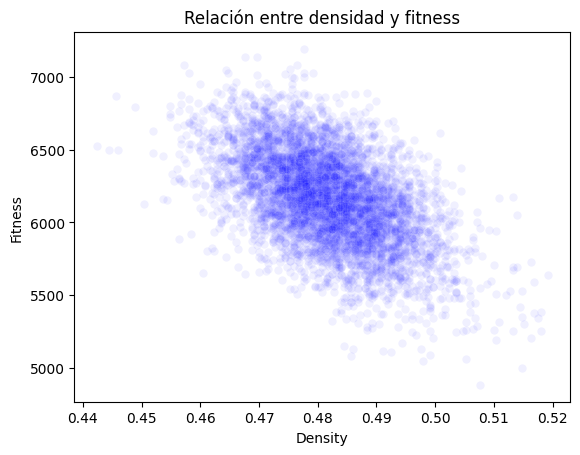

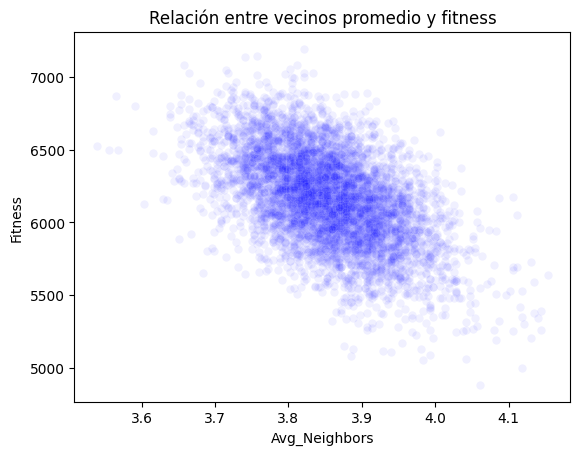

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='Density', y='Fitness', data=data, color='blue', alpha=0.06)
plt.title("Relación entre densidad y fitness")
plt.show()

sns.scatterplot(x='Avg_Neighbors', y='Fitness', data=data, color='blue', alpha=0.06)
plt.title("Relación entre vecinos promedio y fitness")
plt.show()


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Variables independientes (X) y dependiente (y)
X = data[['Density', 'Avg_Neighbors']]
y = data['Fitness']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Conjunto de entrenamiento: {X_train.shape}")
print(f"Conjunto de prueba: {X_test.shape}")


Conjunto de entrenamiento: (4000, 2)
Conjunto de prueba: (1000, 2)


In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
linear_regression_validation = cross_validate(linear_regressor, X_train, y_train, cv=5, return_train_score=True, return_estimator=True)

linear_regression_predictions = linear_regressor.predict(X_test)

linear_regression_mse = mean_squared_error(y_test, linear_regression_predictions)             #calculate the MSE for the linear regression model

print(f"RMSE (Raíz del Error Cuadrático Medio): {linear_regression_mse}")


RMSE (Raíz del Error Cuadrático Medio): 70041.5257066857


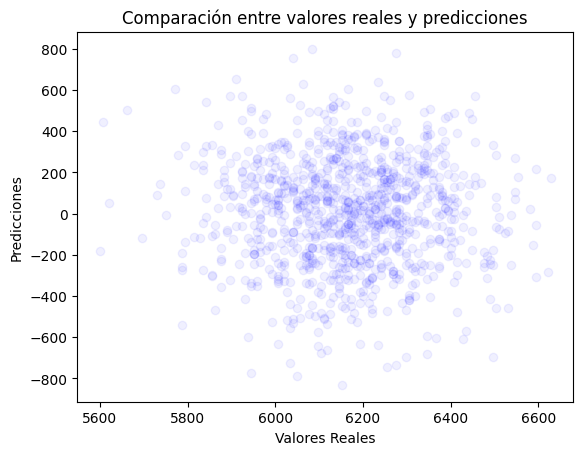

In [65]:
plt.scatter(linear_regression_predictions, y_test - linear_regression_predictions,color='blue',alpha=0.06)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Comparación entre valores reales y predicciones")
plt.show()
